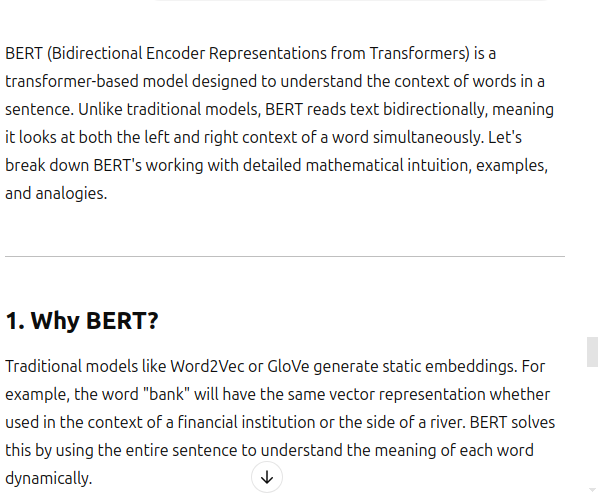

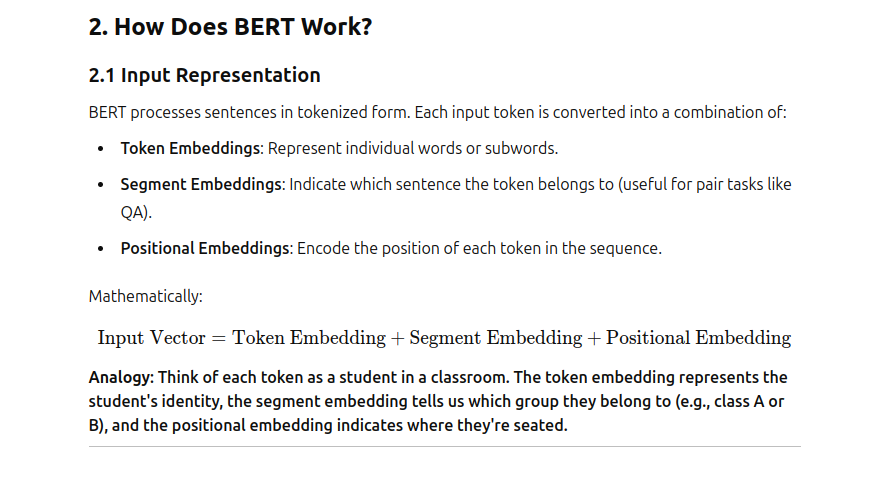

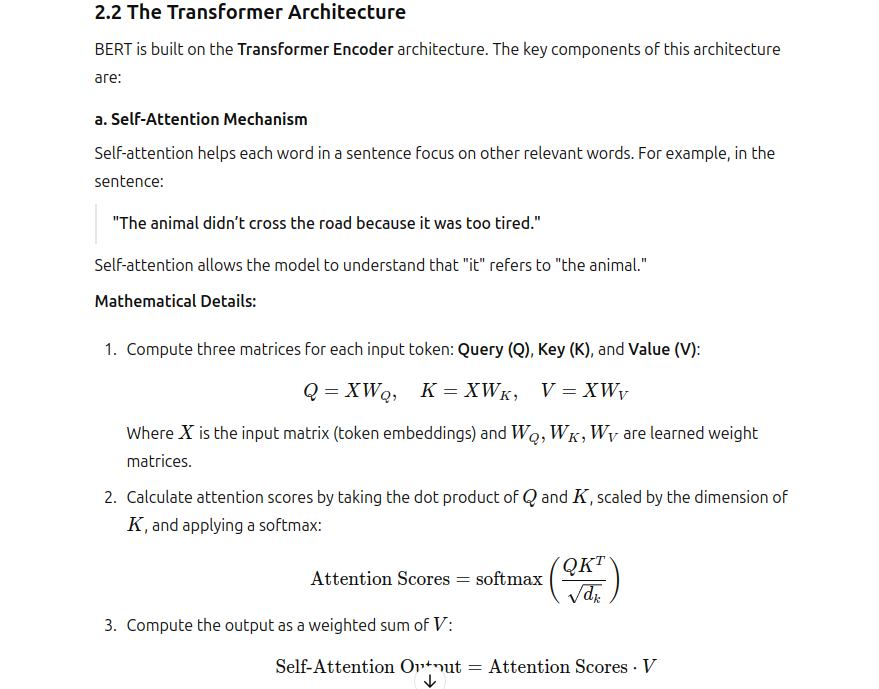

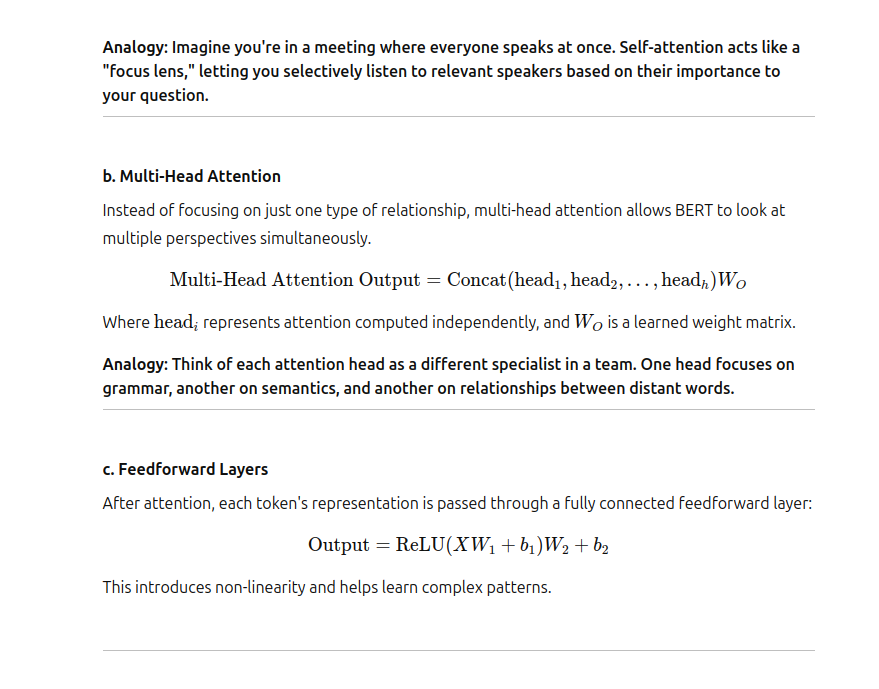

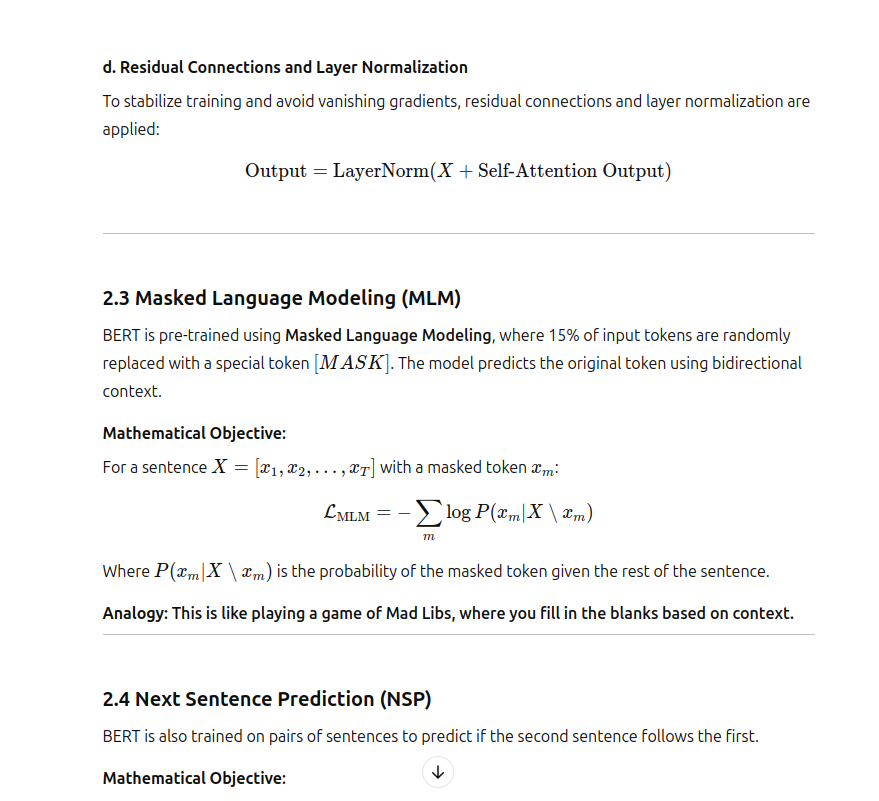

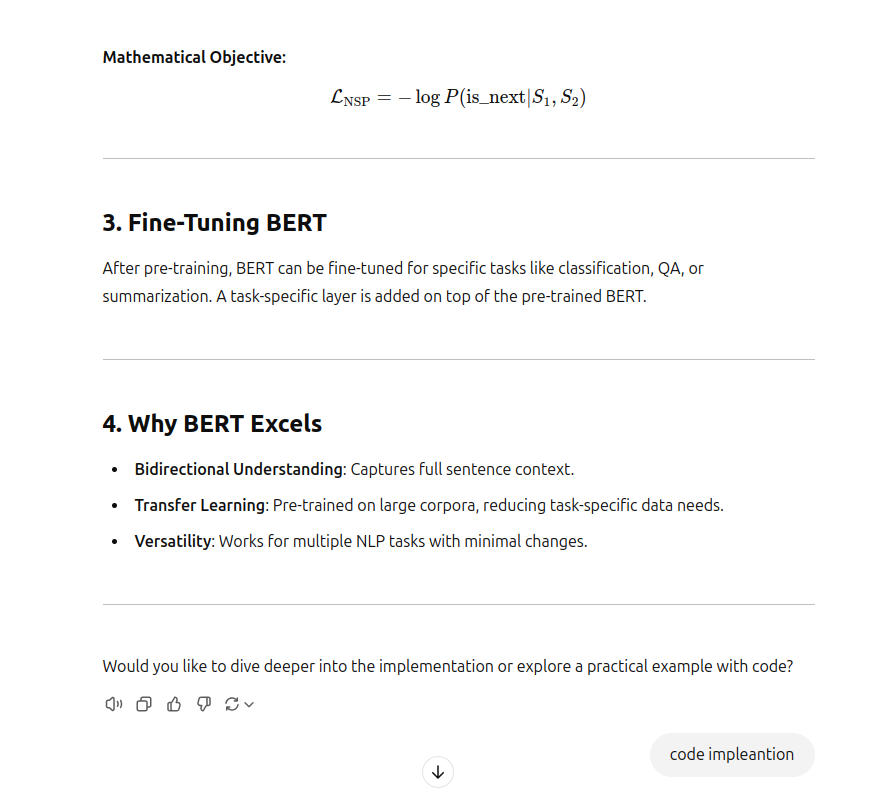

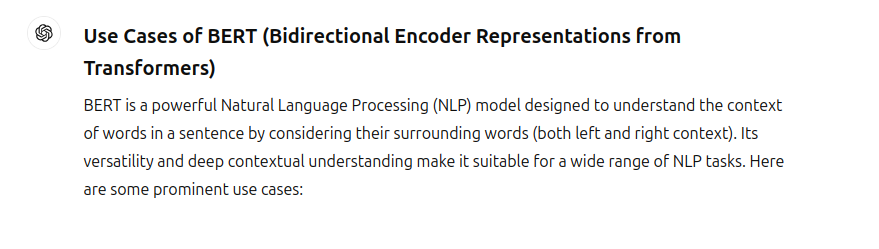
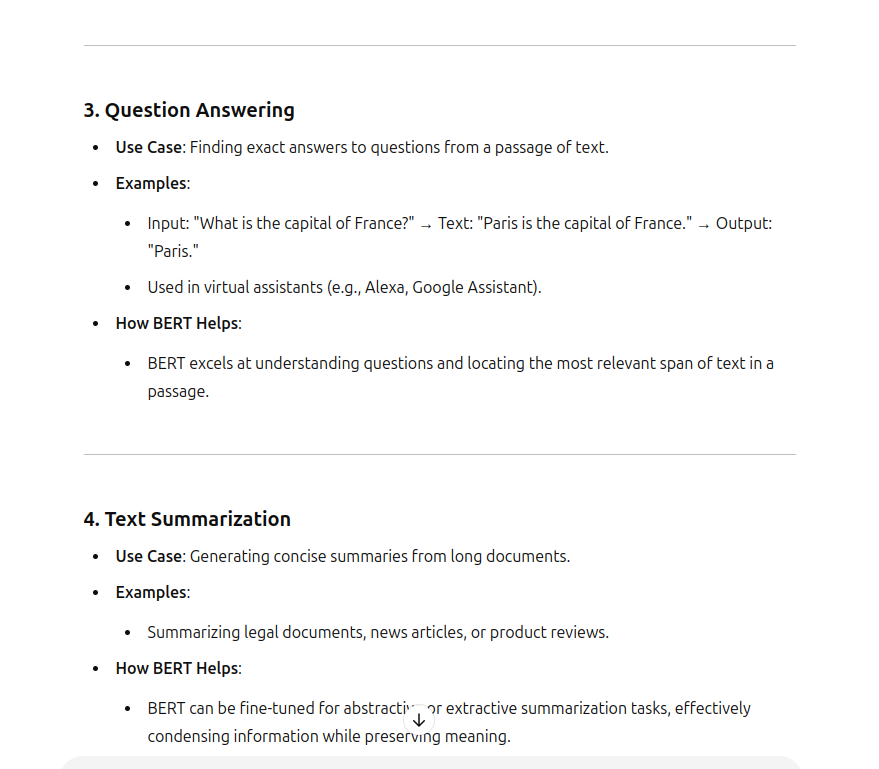
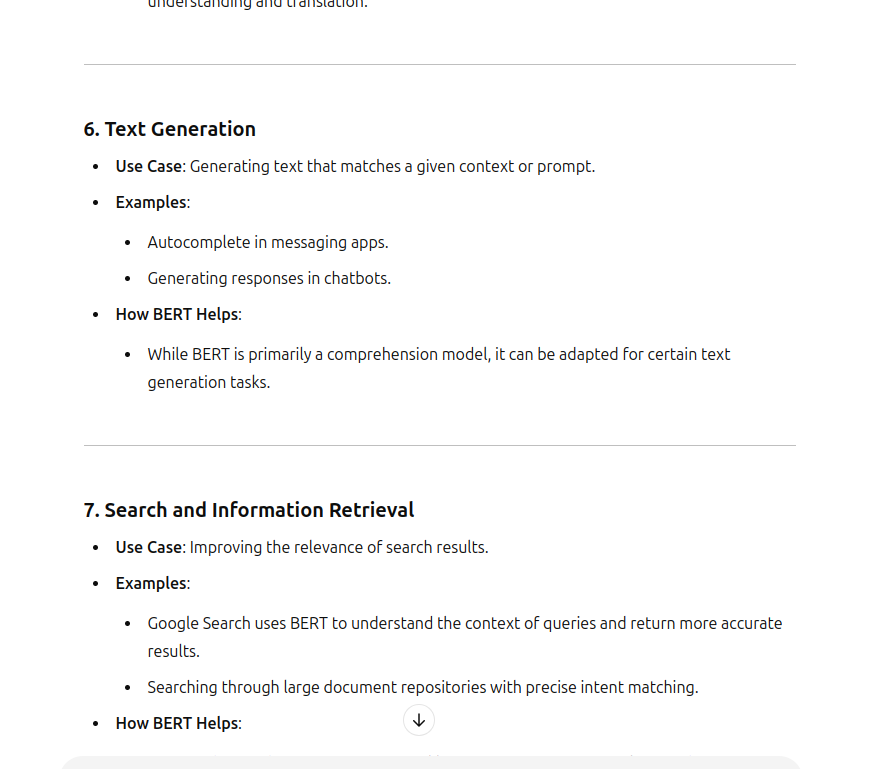
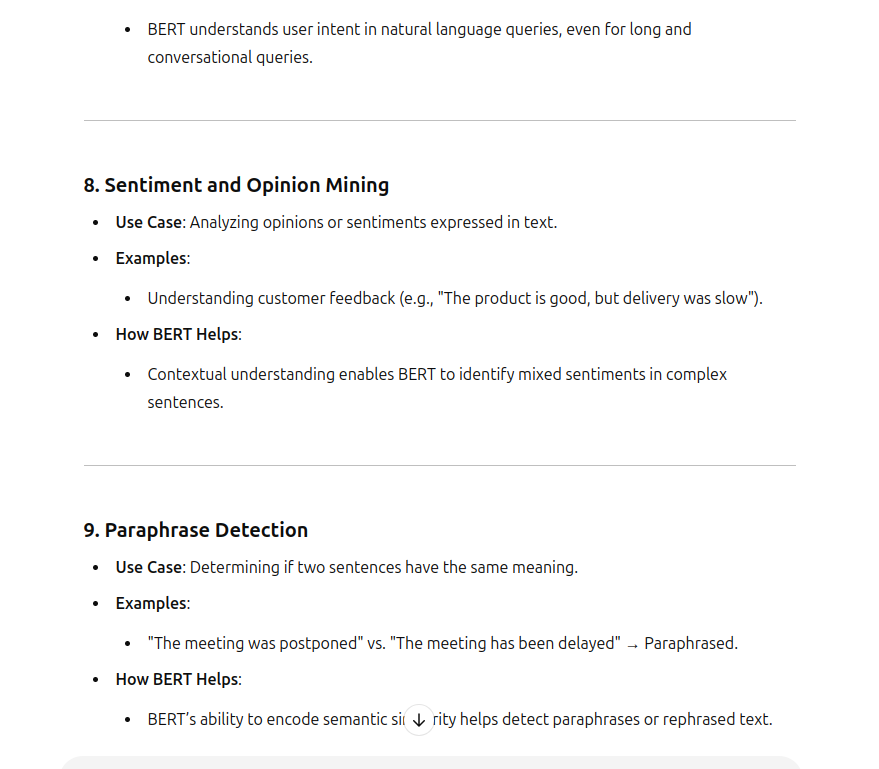
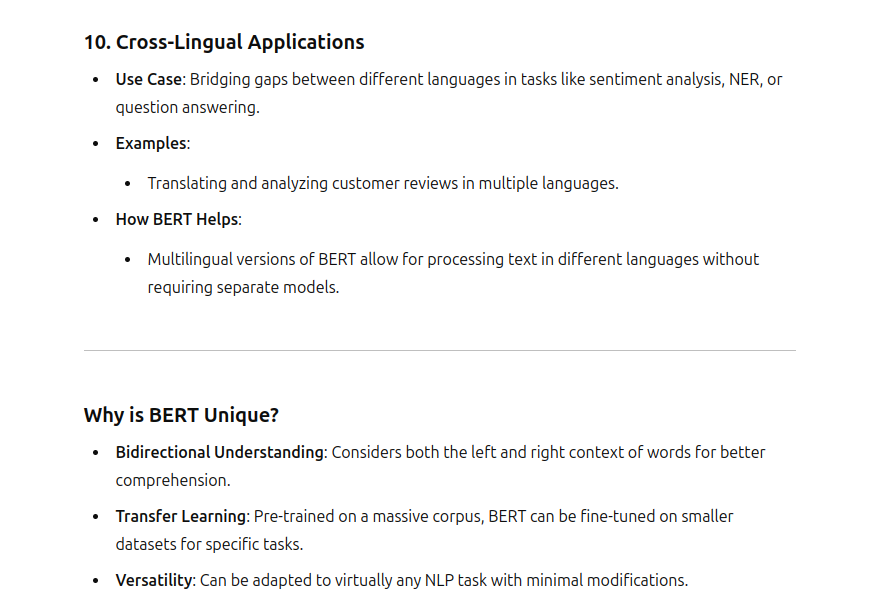

pip install transformers datasets torch


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset, load_metric


In [ ]:
Step 4: Tokenize the Data
BERT requires input to be tokenized into the format: [CLS] sentence [SEP].

python
Copy code
# Load the pre-trained tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)

tokenized_train = train_data.map(tokenize_function, batched=True)
tokenized_test = test_data.map(tokenize_function, batched=True)

In [ ]:
Step 5: Prepare Data for PyTorch
Convert tokenized data into PyTorch tensors.

python
Copy code
# Rename columns to match BERT's expected input
tokenized_train = tokenized_train.rename_column("label", "labels")
tokenized_test = tokenized_test.rename_column("label", "labels")

# Set the format for PyTorch
tokenized_train.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
tokenized_test.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

In [ ]:
# Load pre-trained BERT model for classification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)


In [ ]:
# Step 7: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
)


In [ ]:
Step 8: Define the Trainer

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
    compute_metrics=lambda p: {
        "accuracy": load_metric("accuracy").compute(predictions=p.predictions.argmax(-1), references=p.label_ids)["accuracy"]
    },
)


In [ ]:
# Step 9: Train the Model
trainer.train()


In [ ]:
Step 10: Evaluate the Model
python
Copy code
results = trainer.evaluate()
print(f"Accuracy: {results['eval_accuracy']:.2f}")

In [ ]:
# Tokenize input text
inputs = tokenizer("The movie was fantastic!", return_tensors="pt", truncation=True, max_length=512)

# Get predictions
outputs = model(**inputs)
predictions = torch.argmax(outputs.logits, dim=-1)

# Output the result
sentiment = "Positive" if predictions == 1 else "Negative"
print(f"Sentiment: {sentiment}")


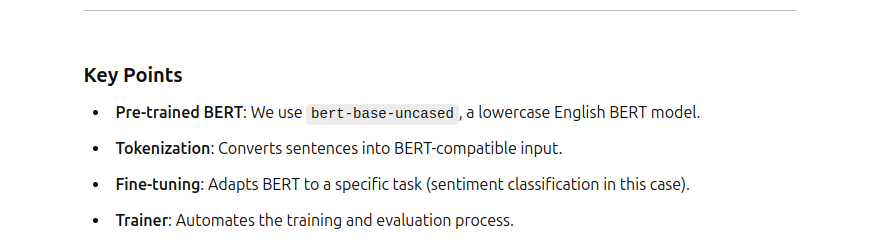